# Visão Computacional - Lista 6

Aqui serão resolvidas as atividades da terceira lista de Visão Computacional pelo aluno Sillas Rocha da Costa, começaremos realizando alguns imports:

In [1]:
import cv2 as cv2
import numpy as np
from matplotlib import pyplot as plt

# Exercício 1 - SIFT (Scale Invariant Feature Transform)

In [2]:
imagem1 = cv2.imread('./keble_a.jpg')
imagem2 = cv2.imread('./keble_b.jpg')
imagem3 = cv2.imread('./keble_c.jpg')

cinza1 = cv2.cvtColor(imagem1, cv2.COLOR_BGR2GRAY)
cinza2 = cv2.cvtColor(imagem2, cv2.COLOR_BGR2GRAY)
cinza3 = cv2.cvtColor(imagem3, cv2.COLOR_BGR2GRAY)

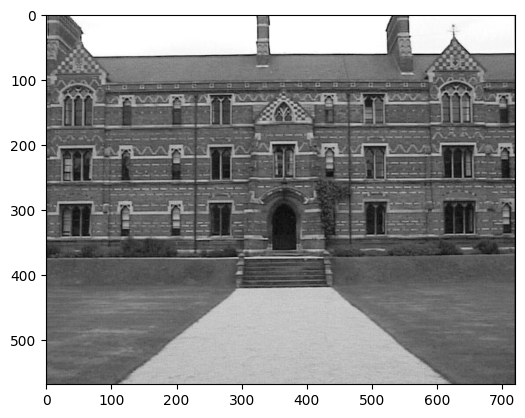

In [3]:
plt.imshow(cinza2, cmap='gray')

In [4]:
sift = cv2.SIFT_create()
pontos1, descritores1 = sift.detectAndCompute(cinza1, None)
pontos2, descritores2 = sift.detectAndCompute(cinza2, None)
pontos3, descritores3 = sift.detectAndCompute(cinza3, None)

In [5]:
imagem_com_circulos = cv2.drawKeypoints(imagem1, pontos1, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# cv2.imshow('SIFT Features', imagem_com_circulos)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [6]:
index_params = dict(algorithm=0, trees=5)
search_params = dict()

matcher = cv2.FlannBasedMatcher(index_params, search_params)
matches = matcher.knnMatch(descritores1, descritores2, k=2)

good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

pontos1 = np.float32([pontos1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
pontos2 = np.float32([pontos2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

matriz_homografia, _ = cv2.findHomography(pontos2, pontos1, cv2.RANSAC, 5.0)

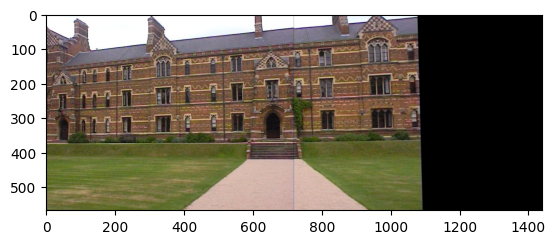

In [7]:
imagem_unida = cv2.warpPerspective(imagem2, matriz_homografia, (imagem1.shape[1] + imagem2.shape[1], imagem1.shape[0]))
imagem_unida[0:imagem1.shape[0], 0:imagem1.shape[1]] = imagem1

plt.imshow(imagem_unida[:,:,::-1])

# 2 - Exercício Teórico

### 1. Linearidade:
Temos que $L(I, t) = g(t)\circledast I$, assim:
$$L(aI_1 + bI_2, t) = g(t)\circledast (aI_1 + bI_2)$$
mas como a convolução é linear, então:
$$g(t)\circledast (aI_1 + bI_2) = a(g(t)\circledast I_1)+b(g(t)\circledast I_2)$$
Entretanto, sabemos que:
$$a(g(t)\circledast I_1)+b(g(t)\circledast I_2) = aL(I_1,t)+bL(I_2,t)$$
Portanto ela é linear.

### 2. Invariância por translação:
Como $L(I, t) = Î(x,y,t) = g(t)\circledast I$, onde tal convolução é dado por:
$$Î(x,y,t) = (g(t)\circledast I)(x,y)=\iint_{\R^2}g(x-s,y-r, t)I(s,r)dsdr$$
Então, se $I$ for transladado, resultará em $Î(x-\Delta x, y-\Delta y, t)$, de modo que:
$$(g(t)\circledast I)(x-\Delta x, y-\Delta y)=\iint_{\R^2}g((x-\Delta x)-s,(y- \Delta y)-r, t)I(s,r)dsdr$$
Onde, ao realizar uma mudança de coordenada de modo que $u = s+\Delta x$ e $v= r + \Delta y$, teremos:
$$Î(x-\Delta x, y-\Delta y, t)=\iint_{\R^2}g(x-u,y-v, t)I(u-\Delta x,v -\Delta y)dudv$$

### 3. Propriedade do semigrupo:
Temos que:
$$L(I, t) = g(t)\circledast I$$
$$L(L(I, t), s) = g(s)\circledast(g(t)\circledast I)$$
Usando a propriedade que a convolução de duas gaussianas é a gaussiana com a soma dos parâmetros, $g(s) \circledast g(t) = g(s + t)$, então:
$$g(s)\circledast(g(t)\circledast I) = g(t + s)\circledast I = L(I, t+s)$$
Provando a propriedade do semigrupo

### 4. Não ampliação de máximos (e minimos) espaciais:
Como sabemos que o efeito da gaussiana é calcular o valor do novo pixel como a soma ponderada dos pixels na vizinhança, assim, essa soma aplicada a um ponto de máximo, resultará no mesmo valor de máximo ou um valor menor, já que, caso toda a região seja composta de valores de máximo, sua soma ponderada será ele este máximo, caso contrário, se houverem outros valores além do máximo, estes valores serão obviamente menores que o valor de máximo, já que eles não são o valor de máximo, assim, o resultado final será um valor menor que o máximo já que a soma ponderará valores menores diminuindo o resultado final, de maneira análoga aos valores de mínimos, já que, é possível obter ou o valor de mínimo, caso a região seja composta apenas de mínimos, ou um valor maior que o de mínimo, caso a região tenha valores diferentes do de mínimo, que, deverão ser maiores que ele. Deste modo, é exemplificado como não há ampliação de máximos e mínimos.

### 5. Invariância por Rotação
Queremos achar $L(R_\theta I, t) = R_\theta L(I, t)$, entretanto:
$$L(R_\theta I, t) = g(t)\circledast (R_\theta I)$$
Mas como a concolução com a gaussiana é invariante por rotação, obtemos:
$$g(t)\circledast (R_\theta I) = R_\theta (g(t)\circledast I) = R_\theta L(I,t)$$
Ou seja, invariante por rotação

# 3 - Extra

In [8]:
cenario = cv2.imread('./Cenario.png')
wally = cv2.imread('./Wally(scale4.0).png')

In [9]:
def find_wally(cenario, wally) -> np.ndarray:
    # Converter as imagens para escala de cinza
    cenario_gray = cv2.cvtColor(cenario, cv2.COLOR_BGR2GRAY)
    wally_gray = cv2.cvtColor(wally, cv2.COLOR_BGR2GRAY)

    # Inicializar o SIFT
    sift = cv2.SIFT_create()
    keypoints_cenario, descritores_cenario = sift.detectAndCompute(cenario_gray, None)
    keypoints_wally, descritores_wally = sift.detectAndCompute(wally_gray, None)

    # Inicializar o FLANN matcher
    index_params = dict(algorithm=1, trees=5)
    search_params = dict(checks=50)
    flann = cv2.FlannBasedMatcher(index_params, search_params)

    # Encontrar as correspondências usando KNN
    matches = flann.knnMatch(descritores_wally, descritores_cenario, k=2)

    good_matches = []
    for m, n in matches:
        if m.distance < 0.75 * n.distance:
            good_matches.append(m)

    src_pts = np.float32([keypoints_wally[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
    dst_pts = np.float32([keypoints_cenario[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

    homeografia, _ = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 19.0)
    
    h, w = wally_gray.shape
    
    center_wally = np.float32([[w/2, h/2]]).reshape(-1, 1, 2)
    center_transformed = cv2.perspectiveTransform(center_wally, homeografia)

    center_x, center_y = center_transformed[0][0]
    
    cenario_highlighted = cv2.circle(cenario, (int(center_x), int(center_y)), 100, (0, 0, 255), 7)
    
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(cenario_highlighted, cv2.COLOR_BGR2RGB))

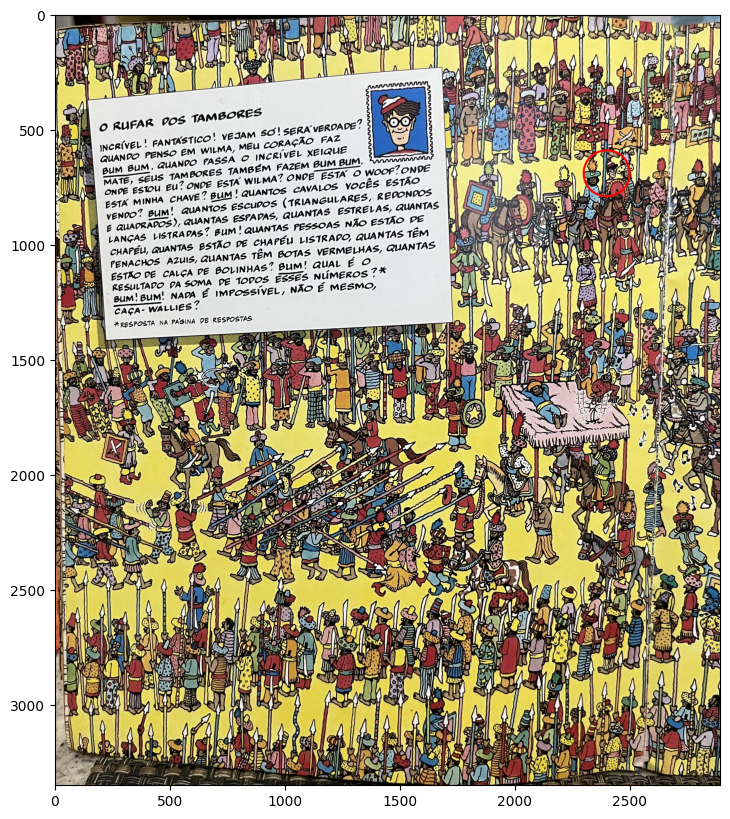

In [10]:
find_wally(cenario, wally)